In [1]:
import pandas as pd
from fullfrlm import flow_refueling_location_model
from get_abm_data import get_cs_data_batch, get_vessel_data_batch
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import time
from flow_computation import flow_computation
from first_stage_frlm import first_stage_frlm
from second_stage_frlm import second_stage_frlm
from generate_network import generate_network
import numpy as np
import pickle

In [2]:
%%time
total_dict = {'r':[], 'max_stations':[], 'c':[], 'm':[], 'fraction_captured_total':[], 'serviceable_fraction':[], 'served_fraction':[], 'optimal_facilities':[], 'non_zero_flows':[], 'add_nodes_used':[]}

CPU times: total: 0 ns
Wall time: 0 ns


In [3]:
G = pickle.load(open('data/network_cleaned_final.p', 'rb'))
df_h = pickle.load(open("data/revised_cleaning_results/harbour_data_100.p", "rb"))
df_ivs = pickle.load(open("data/revised_cleaning_results/ivs_exploded_100.p", "rb"))
path_lengths = pickle.load(open("data/revised_cleaning_results/path_lengths_ship_specific_routes.p", "rb"))
paths = pickle.load(open('data/final_paths.p', "rb"))

In [4]:
df_random = df_ivs
flows = flow_computation(df_random, 100000, path_lengths)
G, paths, inserted = generate_network(G, paths, 25)
inserted += ['8863114', '8864435', '8865887', '8861447', '8864526', '8860631', '8863272', '8863762', '8861611',
                 '8860623', '8864952', '8864915', '8860563', '8860918', '8862907', '8865462', '8860579', '8861863',
                 '8866661', '8864151', '8864912', '8864258', '8861499', '8864553', '8865119']

There were 25 nodes added, the longest remaining link is now: 35117.6542642193


In [5]:
for r in [70000, 110000, 150000]:
    # execute first stage, with or without additional nodes
    df_b, df_g, df_eq_fq, feasible_combinations = first_stage_frlm(r, G, OD=flows, paths=paths,
                                                                           path_lengths=path_lengths, df_h=df_h,
                                                                           additional_nodes=inserted)
    print("first stage finished for r=", r)
    for scenario_var in [0, 1, 2]:
        for max_stations in np.arange(10, 101, 10):
            print(r,scenario_var,max_stations)
            c=0
            x_m=0
            if scenario_var == 0:
                c = 2000
                x_m = 5
            elif scenario_var == 1:
                c = 3333
                x_m = 3
            elif scenario_var == 2:
                c = 10000
                x_m = 1

            # execute second stage
            optimal_facilities, optimal_flows, non_zero_flows, supported_flow, routes_supported = second_stage_frlm(
                max_stations, x_m, c, 24, df_g, df_b, df_eq_fq)

            # collect data
            total_flow = sum(flows.values())

            max_supported = {i: flows[i] for i in flows if len(feasible_combinations[i]) > 0}
            max_supported = sum(max_supported.values())

            fraction_captured_total = (supported_flow / total_flow)

            serviceable_fraction = (max_supported / total_flow)

            served_fraction = (supported_flow / max_supported)

            used_facilities = [i for i, j in optimal_facilities.items() if j > 0]
            add_nodes_used = float(len(list(set(used_facilities) - set(df_h.harbour_node.to_list()))))

            total_dict['r'].append(r)
            total_dict['max_stations'].append(max_stations)
            total_dict['c'].append(c)
            total_dict['m'].append(x_m)
            total_dict['fraction_captured_total'].append(fraction_captured_total)
            total_dict['serviceable_fraction'].append(serviceable_fraction)
            total_dict['served_fraction'].append(served_fraction)
            total_dict['optimal_facilities'].append(optimal_facilities)
            total_dict['non_zero_flows'].append(non_zero_flows)
            total_dict['add_nodes_used'].append(add_nodes_used)

            if served_fraction == 0.95:
                break



first stage finished for r= 70000
70000 0 10
70000 0 20
70000 0 30
70000 0 40
70000 0 50
70000 0 60
70000 0 70
70000 0 80
70000 0 90
70000 0 100
70000 1 10
70000 1 20
70000 1 30
70000 1 40
70000 1 50
70000 1 60
70000 1 70
70000 1 80
70000 1 90
70000 1 100
70000 2 10
70000 2 20
70000 2 30
70000 2 40
70000 2 50
70000 2 60
70000 2 70
70000 2 80
70000 2 90
70000 2 100
first stage finished for r= 110000
110000 0 10
110000 0 20
110000 0 30
110000 0 40
110000 0 50
110000 0 60
110000 0 70
110000 0 80
110000 0 90
110000 0 100
110000 1 10
110000 1 20
110000 1 30
110000 1 40
110000 1 50
110000 1 60
110000 1 70
110000 1 80
110000 1 90
110000 1 100
110000 2 10
110000 2 20
110000 2 30
110000 2 40
110000 2 50
110000 2 60
110000 2 70
110000 2 80
110000 2 90
110000 2 100
first stage finished for r= 150000
150000 0 10
150000 0 20
150000 0 30
150000 0 40
150000 0 50
150000 0 60
150000 0 70
150000 0 80
150000 0 90
150000 0 100
150000 1 10
150000 1 20
150000 1 30
150000 1 40
150000 1 50
150000 1 60
150000 

In [6]:
for r in [70000, 110000, 150000]:
    # execute first stage, with or without additional nodes
    df_b, df_g, df_eq_fq, feasible_combinations = first_stage_frlm(r, G, OD=flows, paths=paths,
                                                                           path_lengths=path_lengths, df_h=df_h,
                                                                           additional_nodes=inserted)
    print("first stage finished for r=", r)
    for scenario_var in [0, 1, 2]:
        for max_stations in np.arange(5, 101, 10):
            print(r,scenario_var,max_stations)
            c=0
            x_m=0
            if scenario_var == 0:
                c = 2000
                x_m = 5
            elif scenario_var == 1:
                c = 3333
                x_m = 3
            elif scenario_var == 2:
                c = 10000
                x_m = 1

            # execute second stage
            optimal_facilities, optimal_flows, non_zero_flows, supported_flow, routes_supported = second_stage_frlm(
                max_stations, x_m, c, 24, df_g, df_b, df_eq_fq)

            # collect data
            total_flow = sum(flows.values())

            max_supported = {i: flows[i] for i in flows if len(feasible_combinations[i]) > 0}
            max_supported = sum(max_supported.values())

            fraction_captured_total = (supported_flow / total_flow)

            serviceable_fraction = (max_supported / total_flow)

            served_fraction = (supported_flow / max_supported)

            used_facilities = [i for i, j in optimal_facilities.items() if j > 0]
            add_nodes_used = float(len(list(set(used_facilities) - set(df_h.harbour_node.to_list()))))

            total_dict['r'].append(r)
            total_dict['max_stations'].append(max_stations)
            total_dict['c'].append(c)
            total_dict['m'].append(x_m)
            total_dict['fraction_captured_total'].append(fraction_captured_total)
            total_dict['serviceable_fraction'].append(serviceable_fraction)
            total_dict['served_fraction'].append(served_fraction)
            total_dict['optimal_facilities'].append(optimal_facilities)
            total_dict['non_zero_flows'].append(non_zero_flows)
            total_dict['add_nodes_used'].append(add_nodes_used)

            if served_fraction == 0.95:
                break



first stage finished for r= 70000
70000 0 5
70000 0 15
70000 0 25
70000 0 35
70000 0 45
70000 0 55
70000 0 65
70000 0 75
70000 0 85
70000 0 95
70000 1 5
70000 1 15
70000 1 25
70000 1 35
70000 1 45
70000 1 55
70000 1 65
70000 1 75
70000 1 85
70000 1 95
70000 2 5
70000 2 15
70000 2 25
70000 2 35
70000 2 45
70000 2 55
70000 2 65
70000 2 75
70000 2 85
70000 2 95
first stage finished for r= 110000
110000 0 5
110000 0 15
110000 0 25
110000 0 35
110000 0 45
110000 0 55
110000 0 65
110000 0 75
110000 0 85
110000 0 95
110000 1 5
110000 1 15
110000 1 25
110000 1 35
110000 1 45
110000 1 55
110000 1 65
110000 1 75
110000 1 85
110000 1 95
110000 2 5
110000 2 15
110000 2 25
110000 2 35
110000 2 45
110000 2 55
110000 2 65
110000 2 75
110000 2 85
110000 2 95
first stage finished for r= 150000
150000 0 5
150000 0 15
150000 0 25
150000 0 35
150000 0 45
150000 0 55
150000 0 65
150000 0 75
150000 0 85
150000 0 95
150000 1 5
150000 1 15
150000 1 25
150000 1 35
150000 1 45
150000 1 55
150000 1 65
150000 1 7

In [8]:
pickle.dump(total_dict, open( "data/max_4_in_combi.p", "wb" ) )

In [10]:
df = pd.DataFrame(total_dict)

In [11]:
df

,r,max_stations,c,m,fraction_captured_total,serviceable_fraction,served_fraction,optimal_facilities,non_zero_flows,add_nodes_used
0,70000,10,2000,5,0.163163,0.578467,0.282061,"{'101': 0.0, '102': 0.0, '103': 0.0, '104': 0....","{('NLABL', 'NLRTM', 0): {'combinations': [['88...",3.0
1,70000,20,2000,5,0.300119,0.578467,0.518819,"{'101': 0.0, '102': 0.0, '103': 0.0, '104': 0....","{('NLABL', 'NLRTM', 0): {'combinations': [['88...",4.0
2,70000,30,2000,5,0.400060,0.578467,0.691587,"{'101': 0.0, '102': 0.0, '103': 0.0, '104': 0....","{('NLABL', 'NLRTM', 0): {'combinations': [['88...",8.0
3,70000,40,2000,5,0.482912,0.578467,0.834813,"{'101': 0.0, '102': 0.0, '103': 0.0, '104': 0....","{('NLABL', 'NLRTM', 0): {'combinations': [['88...",12.0
4,70000,50,2000,5,0.535415,0.578467,0.925576,"{'101': 0.0, '102': 0.0, '103': 0.0, '104': 0....","{('NLABL', 'NLRTM', 0): {'combinations': [['88...",14.0
...,...,...,...,...,...,...,...,...,...,...
175,150000,55,10000,1,0.991755,0.991757,0.999998,"{'101': 0.0, '102': 1.0, '103': 0.0, '104': 0....","{('NLABL', 'NLRTM', 0): {'combinations': [['88...",24.0
176,150000,65,10000,1,0.991755,0.991757,0.999998,"{'101': 0.0, '102': 1.0, '103': 0.0, '104': 0....","{('NLABL', 'NLRTM', 0): {'combinations': [['88...",29.0
177,150000,75,10000,1,0.991757,0.991757,1.000000,"{'101': 1.0, '102': 1.0, '103': 1.0, '104': 1....","{('NLABL', 'NLRTM', 0): {'combinations': [['88...",38.0
178,150000,85,10000,1,0.991742,0.991757,0.999985,"{'101': 1.0, '102': 1.0, '103': 1.0, '104': 1....","{('NLABL', 'NLRTM', 0): {'combinations': [['88...",40.0


In [ ]:
%%time
# for seed in seeds:
total_flow, fraction_captured_total, serviceable_fraction, served_fraction, optimal_facilities, \
        non_zero_flows, routes_supported, paths, G, df_abm, df_random, supported_flow = flow_refueling_location_model(150000, 40, 2000, 5, vis=True, additional_nodes=3)

In [2]:
%%time
# for seed in seeds:
total_flow, fraction_captured_total, serviceable_fraction, served_fraction, optimal_facilities, \
        non_zero_flows, routes_supported, paths, G, df_abm, df_random, supported_flow = flow_refueling_location_model(150000, 40, 2000, 5, vis=True, additional_nodes=3)

There were 25 nodes added, the longest remaining link is now: 35117.6542642193
['8863114', '8864435', '8865887', '8861447', '8864526', '8860631', '8863272', '8863762', '8861611', '8860623', '8864952', '8864915', '8860563', '8860918', '8862907', '8865462', '8860579', '8861863', '8866661', '8864151', '8864912', '8864258', '8861499', '8864553', '8865119'] intersections added



KeyboardInterrupt



In [3]:
supported_routes = list(non_zero_flows.keys())

In [4]:
supported_routes

[('NLALM', 'NLAMS', 0),
 ('NLAMS', 'NLBON', 1),
 ('NLAMS', 'NLBOT', 4),
 ('NLAMS', 'NLDEV', 0),
 ('NLAMS', 'NLEEM', 0),
 ('NLAMS', 'NLHEJ', 0),
 ('NLAMS', 'NLLOB', 0),
 ('NLAMS', 'NLMOE', 1),
 ('NLAMS', 'NLMOE', 2),
 ('NLAMS', 'NLMOE', 3),
 ('NLAMS', 'NLMOE', 4),
 ('NLAMS', 'NLMSB', 1),
 ('NLAMS', 'NLNWG', 0),
 ('NLAMS', 'NLOMD', 1),
 ('NLAMS', 'NLOSS', 0),
 ('NLAMS', 'NLRAS', 0),
 ('NLAMS', 'NLTIE', 0),
 ('NLAMS', 'NLVLA', 3),
 ('NLAMS', 'NLVLA', 4),
 ('NLAMS', 'NLWGW', 0),
 ('NLAMS', 'NLWGW', 1),
 ('NLAMS', 'NLZWI', 3),
 ('NLAMS', 'NLZWI', 4),
 ('NLBON', 'NLKSL', 1),
 ('NLBON', 'NLRTM', 1),
 ('NLBON', 'NLSTI', 0),
 ('NLCUY', 'NLRTM', 0),
 ('NLDOR', 'NLAMS', 3),
 ('NLDOR', 'NLAMS', 4),
 ('NLDOR', 'NLVLI', 0),
 ('NLDRA', 'NLAMS', 0),
 ('NLDST', 'NLAMS', 0),
 ('NLDST', 'NLAMS', 1),
 ('NLDZL', 'NLAMS', 0),
 ('NLEEM', 'NLALM', 1),
 ('NLEEM', 'NLLMR', 1),
 ('NLEEM', 'NLRTM', 1),
 ('NLEEM', 'NLRTM', 2),
 ('NLFAR', 'NLAMS', 0),
 ('NLFAR', 'NLBOT', 3),
 ('NLFAR', 'NLRTM', 1),
 ('NLFAR', 'NLRT

In [2]:
batch_data = pickle.load(open('ABM/own_work/data/batch_run_result_2_5000.p', 'rb'))

In [3]:
df = pd.DataFrame(batch_data)

In [4]:
df

,RunId,iteration,Step,seed,data_completed_trips,AgentID,occupation,max_occupation,avg_line,max_line,charging_stations
0,0,0,0,214982,"{'id': [68, 24, 124, 221, 92, 195, 266, 121, 5...","('8865449', '8861231')",NaN,NaN,NaN,NaN,NaN
1,0,0,0,214982,"{'id': [68, 24, 124, 221, 92, 195, 266, 121, 5...","('8865449', '8862813')",NaN,NaN,NaN,NaN,NaN
2,0,0,0,214982,"{'id': [68, 24, 124, 221, 92, 195, 266, 121, 5...","('8865449', '8867910')",NaN,NaN,NaN,NaN,NaN
3,0,0,0,214982,"{'id': [68, 24, 124, 221, 92, 195, 266, 121, 5...","('8866570', '8863048')",NaN,NaN,NaN,NaN,NaN
4,0,0,0,214982,"{'id': [68, 24, 124, 221, 92, 195, 266, 121, 5...","('8866570', '8863131')",NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
27342,16,0,11520,912238,"{'id': [88, 46, 227, 17, 180, 51, 174, 105, 61...",1995,NaN,NaN,NaN,NaN,NaN
27343,16,0,11520,912238,"{'id': [88, 46, 227, 17, 180, 51, 174, 105, 61...",1996,NaN,NaN,NaN,NaN,NaN
27344,16,0,11520,912238,"{'id': [88, 46, 227, 17, 180, 51, 174, 105, 61...",1997,NaN,NaN,NaN,NaN,NaN
27345,16,0,11520,912238,"{'id': [88, 46, 227, 17, 180, 51, 174, 105, 61...",1998,NaN,NaN,NaN,NaN,NaN


In [5]:
df_cs = get_cs_data_batch(batch_data)

In [6]:
df_cs

,RunId,iteration,Step,seed,data_completed_trips,AgentID,occupation,max_occupation,avg_line,max_line,charging_stations
846,0,0,11520,214982,"{'id': [68, 24, 124, 221, 92, 195, 266, 121, 5...",8863272,5.000000,5.0,38.630952,71.0,5.0
854,0,0,11520,214982,"{'id': [68, 24, 124, 221, 92, 195, 266, 121, 5...",8863206,0.202083,1.0,0.030456,1.0,1.0
857,0,0,11520,214982,"{'id': [68, 24, 124, 221, 92, 195, 266, 121, 5...",8864258,1.300397,2.0,1.764583,8.0,2.0
861,0,0,11520,214982,"{'id': [68, 24, 124, 221, 92, 195, 266, 121, 5...",8863306,0.868651,2.0,0.498611,4.0,2.0
868,0,0,11520,214982,"{'id': [68, 24, 124, 221, 92, 195, 266, 121, 5...",8866775,0.366865,1.0,0.049405,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
26748,16,0,11520,912238,"{'id': [88, 46, 227, 17, 180, 51, 174, 105, 61...",119,0.027778,1.0,0.000000,0.0,1.0
26749,16,0,11520,912238,"{'id': [88, 46, 227, 17, 180, 51, 174, 105, 61...",120,1.000000,1.0,9.159127,14.0,1.0
26750,16,0,11520,912238,"{'id': [88, 46, 227, 17, 180, 51, 174, 105, 61...",121,0.089484,1.0,0.025694,1.0,1.0
26751,16,0,11520,912238,"{'id': [88, 46, 227, 17, 180, 51, 174, 105, 61...",122,5.000000,5.0,30.484524,43.0,5.0


In [7]:
df_cs.AgentID.unique()

array(['8863272', '8863206', '8864258', '8863306', '8866775', '8865462',
       '22638327', '8864111', '8864915', '22638404', '8867392', '8864553',
       '8863762', '8865119', '8860582', '30986757', '8863125', '8861863',
       '8865887', '8864912', '8864526', '8866512', '8867824', '8861611',
       '8865990', '8866429', '8866893', '8865600', '30984595', '8864151',
       '8860623', '8867538', '8865756', '8862776', '8862497', '8866748',
       '8866564', '8863709', '8862448', '8860631', '8861462', '8863570',
       '8864005', '8868208', '8867083', '8863475', '8860563', '8866297',
       '8867130', '8863966', '8863360', '8866686', '8861305', '8862419',
       '8865412', '8863818', '8861499', '8864260', '8864435', '8867258',
       '8863469', '8868191', '8863518', '102', '105', '112', '115', '116',
       '117', '118', '119', '120', '121', '122', '124'], dtype=object)

([<matplotlib.axis.XTick at 0x1e61ea71930>,
 [Text(0, 0, '8863272'),
  Text(1, 0, '8863206'),
  Text(2, 0, '8864258'),
  Text(3, 0, '8863306'),
  Text(4, 0, '8866775'),
  Text(5, 0, '8865462'),
  Text(6, 0, '22638327'),
  Text(7, 0, '8864111'),
  Text(8, 0, '8864915'),
  Text(9, 0, '22638404'),
  Text(10, 0, '8867392'),
  Text(11, 0, '8864553'),
  Text(12, 0, '8863762'),
  Text(13, 0, '8865119'),
  Text(14, 0, '8860582'),
  Text(15, 0, '30986757'),
  Text(16, 0, '8863125'),
  Text(17, 0, '8861863'),
  Text(18, 0, '8865887'),
  Text(19, 0, '8864912'),
  Text(20, 0, '8864526'),
  Text(21, 0, '8866512'),
  Text(22, 0, '8867824'),
  Text(23, 0, '8861611'),
  Text(24, 0, '8865990'),
  Text(25, 0, '8866429'),
  Text(26, 0, '8866893'),
  Text(27, 0, '8865600'),
  Text(28, 0, '30984595'),
  Text(29, 0, '8864151'),
  Text(30, 0, '8860623'),
  Text(31, 0, '8867538'),
  Text(32, 0, '8865756'),
  Text(33, 0, '8862776'),
  Text(34, 0, '8862497'),
  Text(35, 0, '8866748'),
  Text(36, 0, '8866564'),


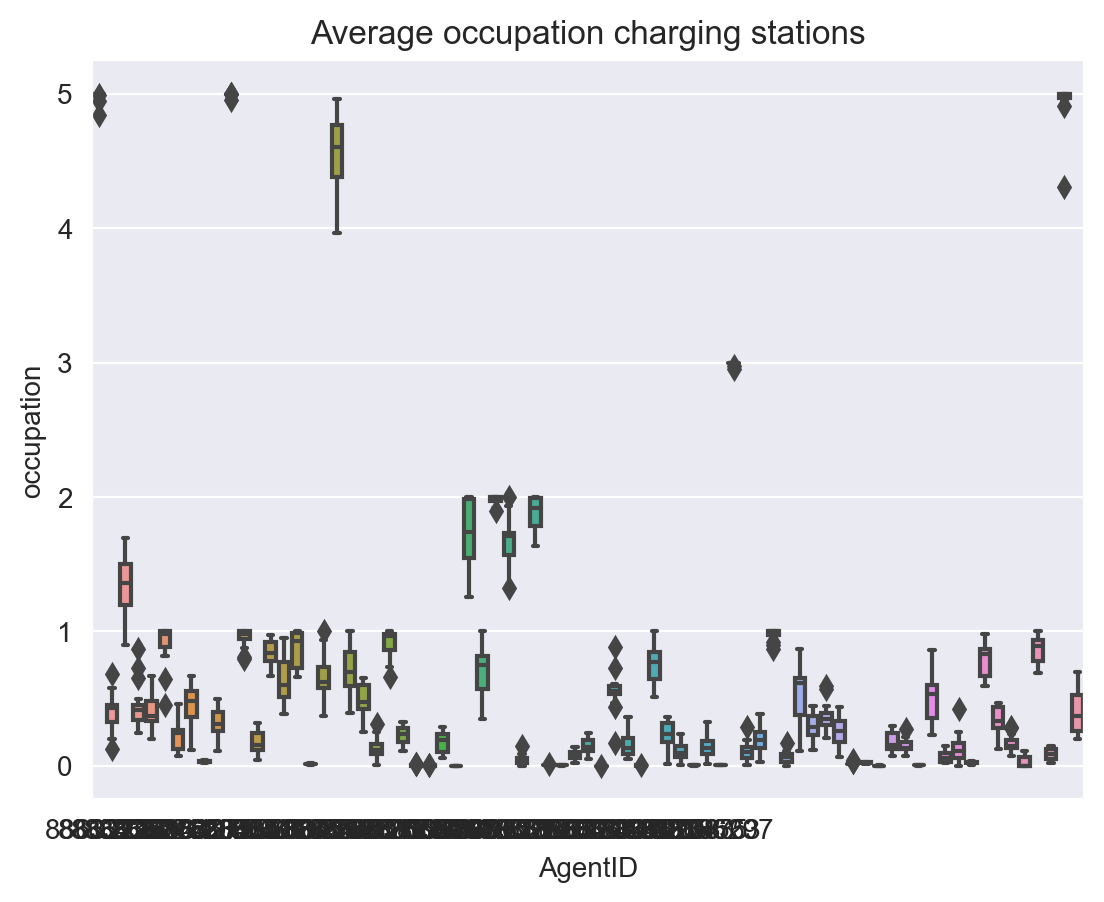

In [8]:
import numpy as np
plt.subplots(dpi=200)
sns.boxplot(x='AgentID', y='occupation', data=df_cs)
plt.title('Average occupation charging stations')
plt.xticks(np.arange(0, 48))

In [9]:
df_cs

,RunId,iteration,Step,seed,data_completed_trips,AgentID,occupation,max_occupation,avg_line,max_line,charging_stations
846,0,0,11520,214982,"{'id': [68, 24, 124, 221, 92, 195, 266, 121, 5...",8863272,5.000000,5.0,38.630952,71.0,5.0
854,0,0,11520,214982,"{'id': [68, 24, 124, 221, 92, 195, 266, 121, 5...",8863206,0.202083,1.0,0.030456,1.0,1.0
857,0,0,11520,214982,"{'id': [68, 24, 124, 221, 92, 195, 266, 121, 5...",8864258,1.300397,2.0,1.764583,8.0,2.0
861,0,0,11520,214982,"{'id': [68, 24, 124, 221, 92, 195, 266, 121, 5...",8863306,0.868651,2.0,0.498611,4.0,2.0
868,0,0,11520,214982,"{'id': [68, 24, 124, 221, 92, 195, 266, 121, 5...",8866775,0.366865,1.0,0.049405,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
26748,16,0,11520,912238,"{'id': [88, 46, 227, 17, 180, 51, 174, 105, 61...",119,0.027778,1.0,0.000000,0.0,1.0
26749,16,0,11520,912238,"{'id': [88, 46, 227, 17, 180, 51, 174, 105, 61...",120,1.000000,1.0,9.159127,14.0,1.0
26750,16,0,11520,912238,"{'id': [88, 46, 227, 17, 180, 51, 174, 105, 61...",121,0.089484,1.0,0.025694,1.0,1.0
26751,16,0,11520,912238,"{'id': [88, 46, 227, 17, 180, 51, 174, 105, 61...",122,5.000000,5.0,30.484524,43.0,5.0


Text(0.5, 1.0, 'Average line length')

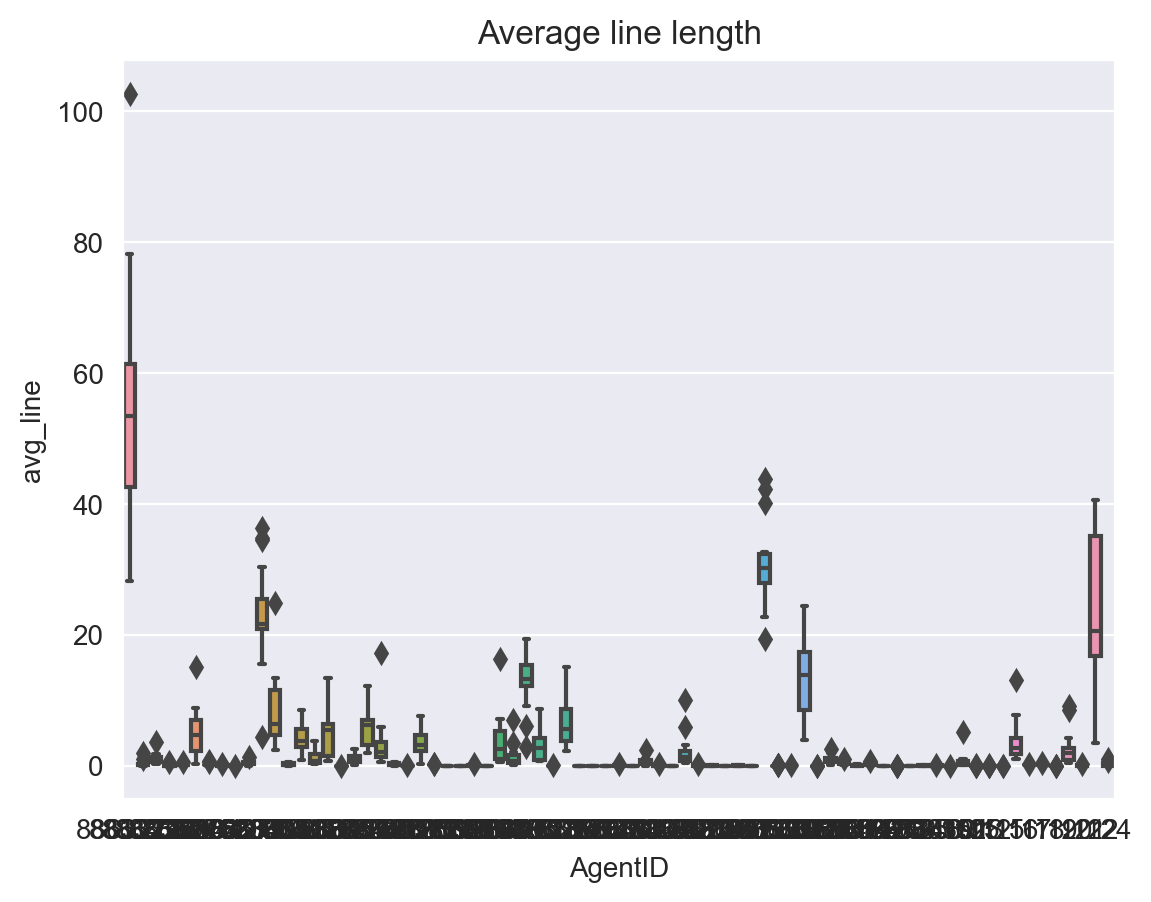

In [10]:
plt.subplots(dpi=200)
sns.boxplot(x='AgentID', y='avg_line', data=df_cs)
plt.title('Average line length')

In [11]:
df_vessels = get_vessel_data_batch(batch_data)

Text(0.5, 1.0, 'Time in line')

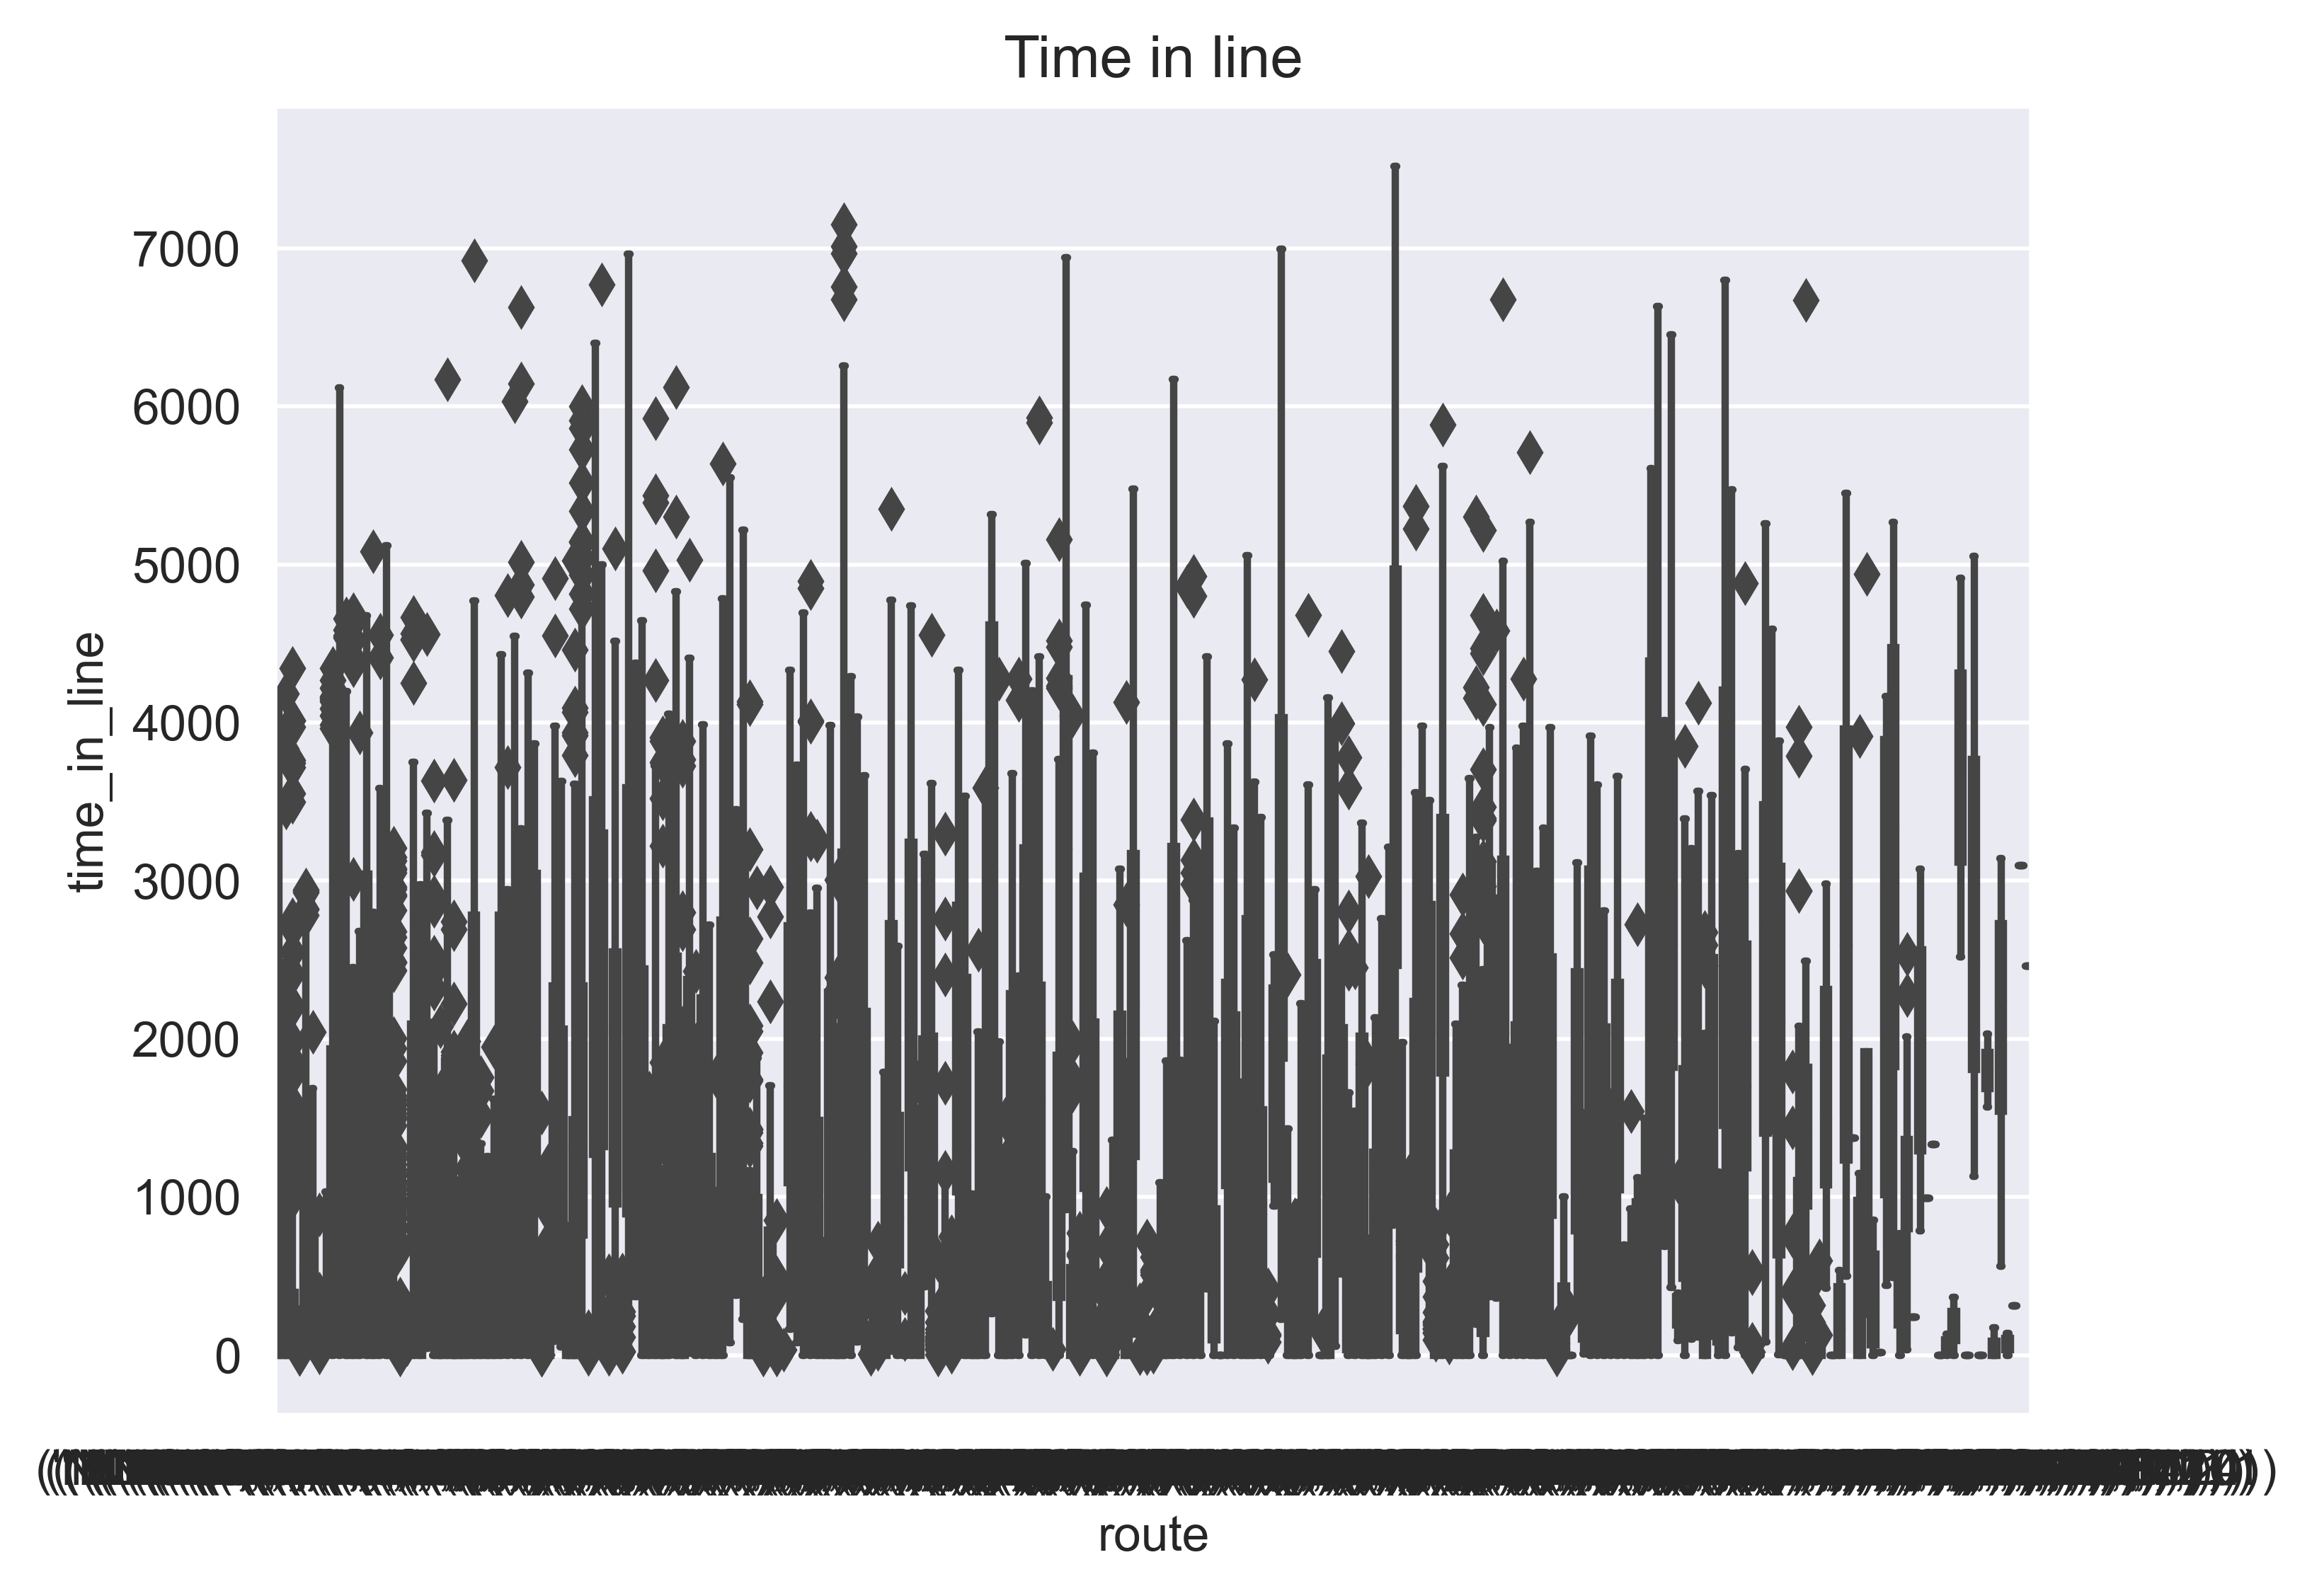

In [12]:
plt.subplots(dpi=500)
sns.boxplot(x='route', y='time_in_line', data=df_vessels)
plt.title('Time in line')

In [13]:
df_vessels

,id,route,combi,generation_hour,time_departed,travel_time,time_in_line,time_charging,battery_size
0,68,"(NLBZM, NLRTM, 0)",[8867130],2,392,441,330,610,440501
1,24,"(NLNIJ, NLABL, 0)","[22638327, 116]",15,137,640,658,671,1145861
2,124,"(NLRTM, NLMOE, 0)",[30984595],14,673,208,0,567,897372
3,221,"(NLDRO, NLKAM, 0)",[8868191],8,1180,93,0,175,277707
4,92,"(NLOSS, NLRTM, 0)","[8863306, 8865119]",18,482,552,426,433,440501
...,...,...,...,...,...,...,...,...,...
1337,1501,"(NLRTM, NLVLI, 0)","[8864258, 8864111]",18,8709,835,1365,1950,897372
1338,1926,"(NLAMS, NLWGW, 0)","[8865412, 8865887]",11,10997,500,0,4,271875
1339,1231,"(NLHRD, NLAMS, 0)","[8861611, 8863272]",5,7133,444,3648,3929,440501
1340,1412,"(NLRTM, NLNIJ, 0)","[8863306, 116, 22638327]",2,8253,673,2554,2584,1254657


In [31]:
df_hourp = df_vessels.groupby('generation_hour').count()

In [38]:
df_ivs = pickle.load(open("data/revised_cleaning_results/ivs_exploded_100.p", "rb"))

In [44]:
df_ivs['route'] = tuple([df_ivs.origin,df_ivs.destination,df_ivs.route_v])

ValueError: Length of values (3) does not match length of index (5448)

In [32]:
supported_routes = list(df_vessels.route.unique())

In [36]:
supported_routes

[('NLDRO', 'NLKAM', 0),
 ('NLNIJ', 'NLDRU', 0),
 ('NLMSB', 'NLBON', 0),
 ('NLRTM', 'NLAPN', 0),
 ('NLTNZ', 'NLVLI', 0),
 ('NLSWI', 'NLNKK', 0),
 ('NLRTM', 'NLMOE', 0),
 ('NLFAR', 'NLEEM', 0),
 ('NLAMS', 'NLAER', 0),
 ('NLRTM', 'NLOOS', 1),
 ('NLALM', 'NLHGL', 0),
 ('NLALK', 'NLIJM', 0),
 ('NLGOR', 'NLRTM', 0),
 ('NLMEP', 'NLZWS', 0),
 ('NLWGW', 'NLRTM', 0),
 ('NLNIJ', 'NLWAS', 0),
 ('NLNER', 'NLVEN', 0),
 ('NLNKK', 'NLAMS', 0),
 ('NLHRD', 'NLAMS', 0),
 ('NLAMS', 'NLDHR', 0),
 ('NLAMS', 'NLWGW', 0),
 ('NLUTC', 'NLRTM', 0),
 ('NLLEY', 'NLAMS', 0),
 ('NLAMS', 'NLTIE', 0),
 ('NLZWO', 'NLAMS', 0),
 ('NLRTM', 'NLMOE', 1),
 ('NLBZM', 'NLRTM', 0),
 ('NLSWI', 'NLAMS', 0),
 ('NLIJM', 'NLRTM', 0),
 ('NLIJM', 'NLRTM', 2),
 ('NLDOR', 'NLRTM', 0),
 ('NLRTM', 'NLWLK', 1),
 ('NLLEY', 'NLLWR', 0),
 ('NLNIJ', 'NLVEN', 0),
 ('NLTLB', 'NLRTM', 1),
 ('NLAER', 'NLRTM', 0),
 ('NLIJM', 'NLMOE', 2),
 ('NLOOS', 'NLTLB', 0),
 ('NLAER', 'NLLEY', 0),
 ('NLOMD', 'NLWAS', 0),
 ('NLAMS', 'NLZWI', 2),
 ('NLDOR', 'NLAM

In [33]:
#subset supported routes here before we take sum!
df_ivs = df_ivs.loc[df_ivs.route.isin(supported_routes[0])]

In [34]:
df_ivs_group = df_ivs.groupby("hour").sum()

In [35]:
df_ivs_group

,trip_count,M12,M8,BII-6b,M10,BIIa-1,M9,BII-6l,C3b,BII-4,...,C4,B04,C2l,BII-2L,B02,C1b,C2b,B01,C1l,route_v
hour,,,,,,,,,,,,,,,,,,,,,


ValueError: min() arg is an empty sequence

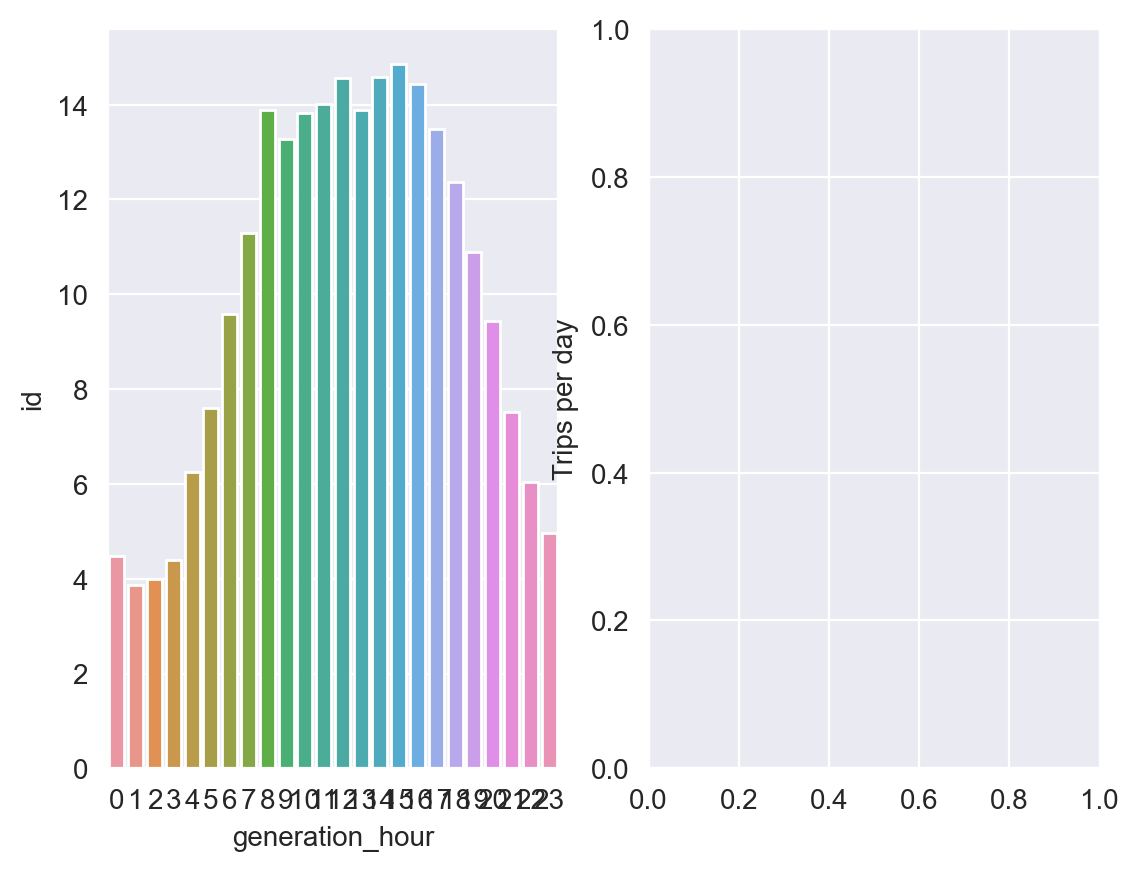

In [22]:
df_ivs = pickle.load(open("data/revised_cleaning_results/ivs_exploded_100.p", "rb"))
fig, ax = plt.subplots(1, 2, dpi=200)
sns.barplot(x=df_hourp.index, y=df_hourp.id/(100*7), ax=ax[0])
plt.ylabel('Trips per day')
sns.barplot(x=df_ivs_group.index, y=df_ivs_group.trip_count/(52*7), ax=ax[1])
plt.ylabel('Trips per day')

In [ ]:
from scipy import stats
stats.ttest_rel(df_hourp.id, df_ivs_group.trip_count)

In [33]:
df_ivs.groupby('hour').count()

In [10]:
df_vessels.groupby('route').mean().sort_values('time_in_line', ascending=False)

,id,time_departed,travel_time,time_in_line,time_charging,battery_size
route,,,,,,
"(NLVEN, NLBON, 0)",220.636364,6217.363636,242.636364,11.909091,138.000000,6026.363636
"(NLNIJ, NLWAS, 0)",230.700000,6506.300000,229.600000,9.100000,151.900000,5964.000000
"(NLTNZ, NLVLI, 0)",200.733333,5599.133333,110.000000,7.066667,79.666667,5766.533333
"(NLALK, NLIJM, 0)",191.411765,5380.882353,258.000000,2.705882,56.764706,2335.529412
"(NLOOS, NLTLB, 0)",261.866667,7439.266667,127.000000,2.066667,83.666667,6650.000000
"(NLGOR, NLRTM, 0)",201.133333,5807.600000,237.000000,1.133333,112.733333,5455.800000
"(NLRTM, NLAPN, 0)",186.026316,5265.184211,186.000000,1.131579,73.921053,3631.157895
"(NLMOE, NLAPN, 1)",176.500000,4947.000000,317.000000,0.833333,161.000000,6078.333333
"(NLRTM, NLGTB, 1)",144.222222,4159.888889,263.555556,0.000000,119.333333,5148.888889


In [11]:
df_vessels

,id,route,combi,time_departed,travel_time,time_in_line,time_charging,battery_size
0,1,"(NLSWI, NLLEY, 0)",[8863709],16,99,0,67,3220
1,4,"(NLAMS, NLZAA, 0)",[8866763],112,30,0,48,3220
2,7,"(NLDOR, NLRTM, 1)",[8862663],239,130,0,0,9404
3,0,"(NLHAR, NLWTE, 0)","[8865756, 8865605]",13,206,0,167,9404
4,2,"(NLRTM, NLWLK, 1)","[8866893, 8863306]",63,361,0,46,2031
...,...,...,...,...,...,...,...,...
408,406,"(NLRTM, NLMOE, 0)",[8865003],11074,188,0,148,6650
409,407,"(NLUTC, NLTIE, 0)","[8867240, 22638146]",11114,195,0,112,6650
410,412,"(NLRTM, NLAPN, 0)",[8867538],11215,186,0,66,3220
411,409,"(NLRTM, NLMOE, 0)",[8865003],11134,188,0,148,6650


In [18]:
df_cs = get_cs_data_batch(batch_data)
df_cs

,occupation,max_occupation,avg_line,max_line,charging_stations
AgentID,,,,,
8868191,0.024715,1.000,0.000000,0.000,1.0
8866297,0.029725,1.000,0.000000,0.000,1.0
8863709,0.030419,1.000,0.000174,0.125,1.0
8865412,0.032713,1.000,0.000930,0.375,1.0
22638146,0.037636,1.000,0.000000,0.000,1.0
8864111,0.042597,1.000,0.002046,0.250,1.0
8864837,0.045734,1.000,0.000694,0.375,1.0
8868208,0.047321,1.000,0.001426,0.250,1.0
8867395,0.050062,1.000,0.000322,0.125,1.0


In [19]:

df_vessels = get_vessel_data_batch(batch_data)
df_vessels.groupby('route').mean().sort_values('time_in_line', ascending=False)

,id,time_departed,travel_time,time_in_line,time_charging,battery_size
route,,,,,,
"(NLVEN, NLBON, 0)",220.636364,6217.363636,242.636364,11.909091,138.000000,6026.363636
"(NLNIJ, NLWAS, 0)",230.700000,6506.300000,229.600000,9.100000,151.900000,5964.000000
"(NLTNZ, NLVLI, 0)",200.733333,5599.133333,110.000000,7.066667,79.666667,5766.533333
"(NLALK, NLIJM, 0)",191.411765,5380.882353,258.000000,2.705882,56.764706,2335.529412
"(NLOOS, NLTLB, 0)",261.866667,7439.266667,127.000000,2.066667,83.666667,6650.000000
"(NLGOR, NLRTM, 0)",201.133333,5807.600000,237.000000,1.133333,112.733333,5455.800000
"(NLRTM, NLAPN, 0)",186.026316,5265.184211,186.000000,1.131579,73.921053,3631.157895
"(NLMOE, NLAPN, 1)",176.500000,4947.000000,317.000000,0.833333,161.000000,6078.333333
"(NLRTM, NLGTB, 1)",144.222222,4159.888889,263.555556,0.000000,119.333333,5148.888889
